# FAIR Introduction Exercises

Before we start we import the python modules we will need to do these exercises, make the figure output directory if we need to and print out which version of fair we're using.

In [1]:
import numpy as np

# %matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 16, 9
plt.style.use('seaborn-darkgrid')
font = {'weight' : 'normal',
          'size'   : 16}

plt.rc('font', **font)

from IPython import display
import time

from os import makedirs
from os.path import isdir
from os.path import join
outpath = './exercise-figures'
try: 
    makedirs(outpath)
except OSError:
    if not isdir(outpath):
        raise

import fair
print "You are using version {0} of fair".format(fair.__version__)

You are using version 1.0.1 of fair


## Exercise 1. Investigating the effect of emissions on atmospheric CO$_2$ concentrations

### Set up

Here we are going to look at the effect of CO$_2$ emissions on atmospheric CO$_2$ concentrations To start with we introduce the set up.

Here we provide the code to make a plot of CO$_2$ emissions and atmospheric CO$_2$ concentrations. In the pre-industrial era emissions were zero so I've set the x-axis limits to start in 1800 to approximately reflect this. To start with, we just set emissions to be zero before year 50 and constant afterwards.

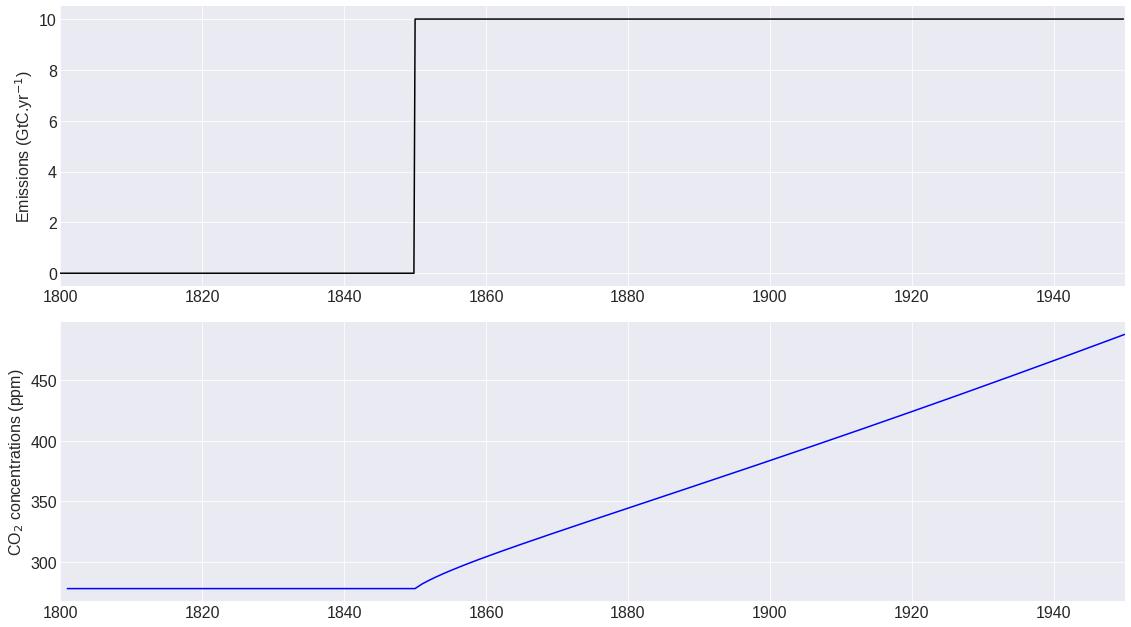

In [2]:
# set our co2_emissions levels
co2_emms_level = 10.0
# set the total length of time in years
total_time = 150

# here I define a function which sets our CO_2 emissions array so we can
# use it later
def set_co2_emms(co2_emms_level,total_time):
    # set up an array to hold our CO_2 concentrations
    co2_emms = np.zeros(total_time)
    # set our pre industrial concentrations
    co2_emms[50:] = co2_emms_level
    return co2_emms

# here I define a function to make the relevant plot for this exercise and
# return the peak temperature
def ex1_plot(co2_emms):
    # run FAIR
    C,T = fair.forward.fair_scm(emissions=co2_emms)

    # plot the output
    fig = plt.figure()
    emmsax = fig.add_subplot(211)
    concax = fig.add_subplot(212)
    fig2 = plt.figure()
    junk = fig2.add_subplot(111)
    plt.close()
    fig,emmsax,concax,forcax,tempax = fair.forward.plot_fair(co2_emms,
                                                             C,
                                                             0.0,
                                                             T,
                                                             infig=fig,
                                                             inemmsax = emmsax,
                                                             inconcax = concax,
                                                             inforcax = junk,
                                                             intempax = junk,
                                                             tuts='years',
                                                             y_0=1800)
    concax.set_xlim([1800,1800+len(co2_emms)])
    emmsax.set_xlim(concax.get_xlim())
    
# now we can set our co2_emms and make the plot
co2_emms = set_co2_emms(co2_emms_level,total_time)
ex1_plot(co2_emms)
display.display(plt.gcf()) 

Your turn: Try choosing some different emissions levels and time periods then see what effect, if any, they have on global concentrations.

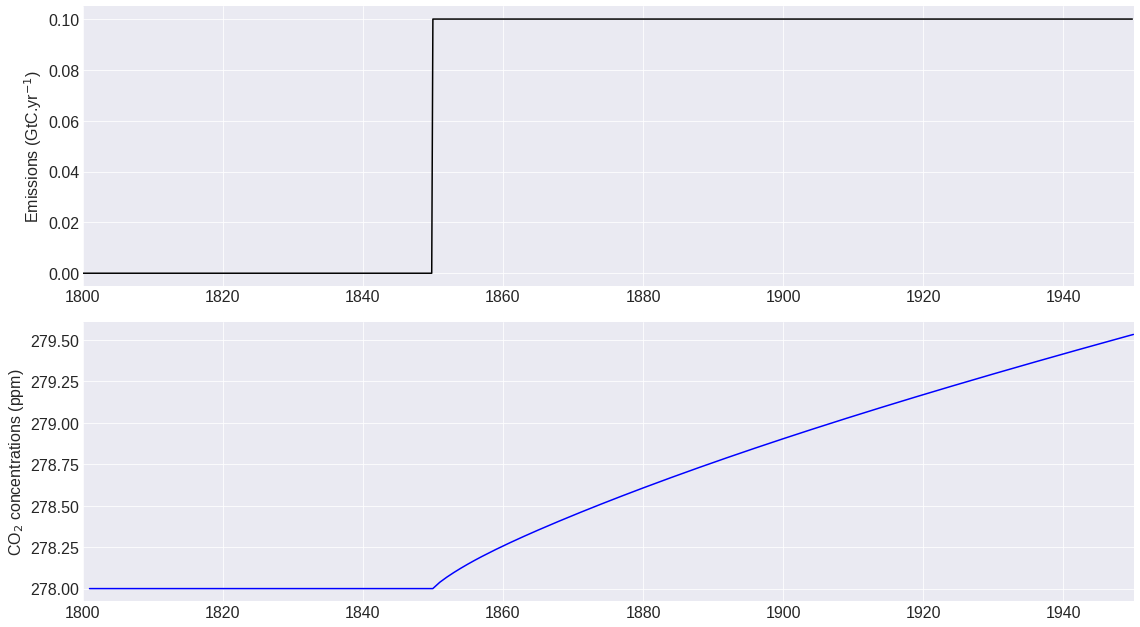

In [3]:
# set our co2_emissions levels
co2_emms_level = 0.1
# set the total length of time in years
total_time = 150
co2_emms = set_co2_emms(co2_emms_level,total_time)
ex1_plot(co2_emms)
display.display(plt.gcf()) 

Now we're going to make our emissions time dependent. You can choose any emissions pathway you want, I have shown you how to make two which might be of use.

In [4]:
def quad_emissions(peak,length,total_time):
    """
    Create a quadratic emissions timeseries
    
    Emissions are zero from 1800-1850 then vary quadratically
    from zero in 1850 up to peak before returning to zero when
    time is equal to length.
    
    If the maths here doesn't make sense, don't worry about it.
    """
    
    # initialise our emissions array
    co2_emms = np.zeros(total_time)
    # create a time array for our period where emissions are non-zero
    t = np.arange(0,length,1.0)
    # get length and total_time as integers
    length = int(length)
    total_time = int(total_time)
    # get peak and length as floats
    fpeak = float(peak)
    flength = float(length)
    # set our emissions to vary quadratically between 1850 and 1850+length
    # this means we have
    # co2_emms = a(t+b)**2 + c
    # turning point is at (-b,c) hence we want b=-length/2, c=peak
    b = -flength/2
    c = fpeak
    # we also want (0,0) to be a solution of co2_emms = a(t+b)**2 + c
    # hence we have a = -c/b**2
    a = -fpeak/(flength**2/4)
    
    co2_emms[50:50+length] = a*(t+b)**2 + c
    
    return co2_emms

def ramp_emissions(ramp_up,peak,steady,ramp_down,bottom,total_time):
    """
    Create an emissions timeseries which ramps up, is constant then ramps down
    
    Emissions are zero from 1800 to 1850 then ramp up over ramp_up years to peak
    at the value defined by peak. They're then steady for the number of years defined
    by steady and then ramp down over ramp_down years before ending up being constant
    at the value defined by bottom
    """
    
    # convert ramp_up, steady and ramp_down to integers
    ramp_up = int(ramp_up)
    ramp_down = int(ramp_down)
    steady = int(steady)
    # get floats of these variables too
    fru = float(ramp_up)
    frd = float(ramp_down)
    # convert peak and bottom to a float
    peak = float(peak)
    bottom = float(bottom)
    # initialise our emissions array
    co2_emms = np.zeros(total_time)
    # ramp up
    rut = np.arange(0,ramp_up,1.0)
    co2_emms[50:50+ramp_up] = peak/ramp_up *rut
    # hold steady
    ruy = 50+ramp_up
    co2_emms[ruy:ruy+steady] = peak
    # decline
    sty = ruy + steady
    rdt = np.arange(0,ramp_down,1.0)
    grad = (peak-bottom)/frd
    co2_emms[sty:sty+ramp_down] = peak - grad*rdt
    # steady again
    rdy = sty + ramp_down
    co2_emms[rdy:] = bottom
    
    return co2_emms

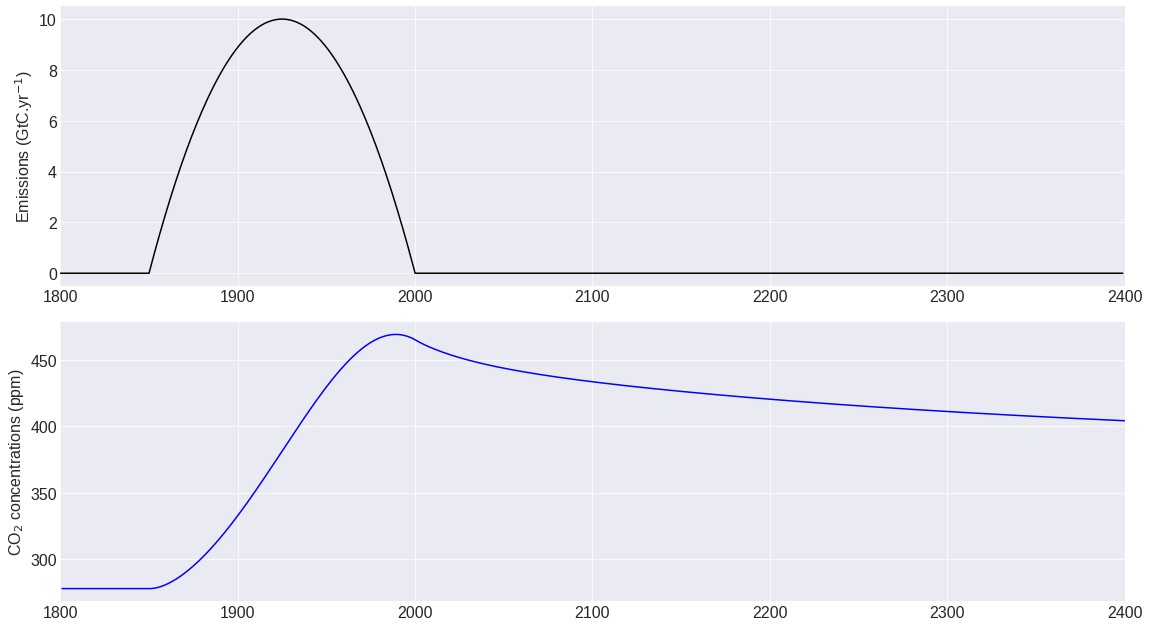

In [5]:
peak = 10
length = 150
total_time = 600
co2_emms = quad_emissions(peak,length,total_time)
ex1_plot(co2_emms)
display.display(plt.gcf()) 

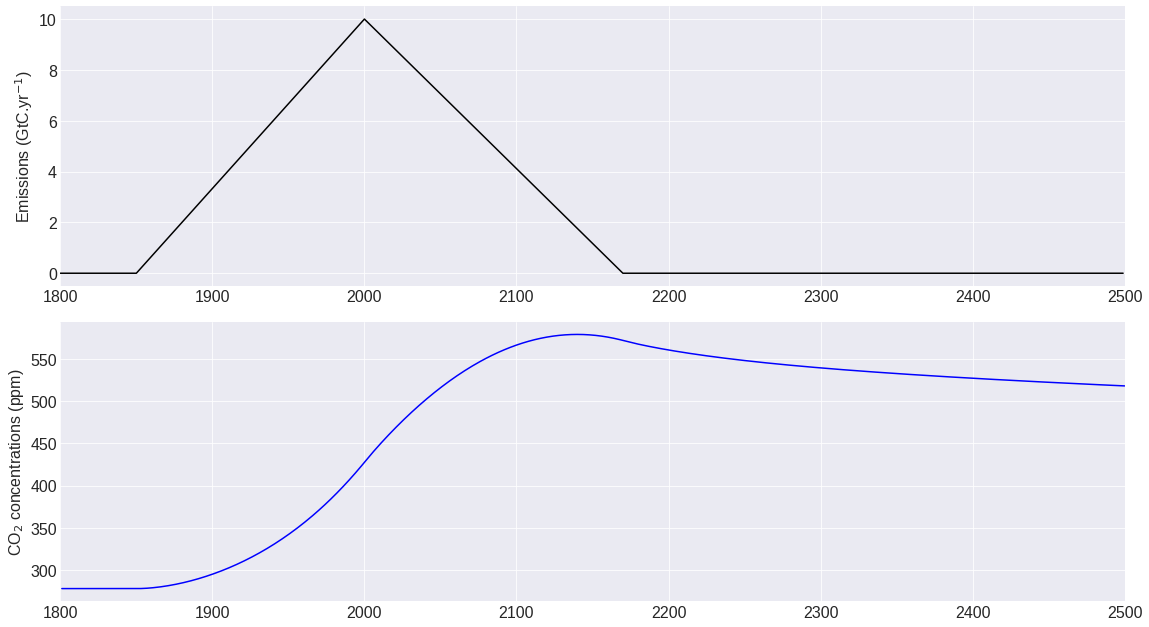

In [6]:
ramp_up = 150
peak = 10
steady = 0
ramp_down = 170
bottom = 0
total_time = 700
co2_emms = ramp_emissions(ramp_up,peak,steady,ramp_down,bottom,total_time)
ex1_plot(co2_emms)
display.display(plt.gcf()) 

Play around with possible pathways, using both the functions defined above and your own custom pathways and see if you can come up with a pathway where our peak emissions are around 10 GtC.yr$^{-1}$ and atmospheric CO$_2$ concentrations stabilise at 450pm. 

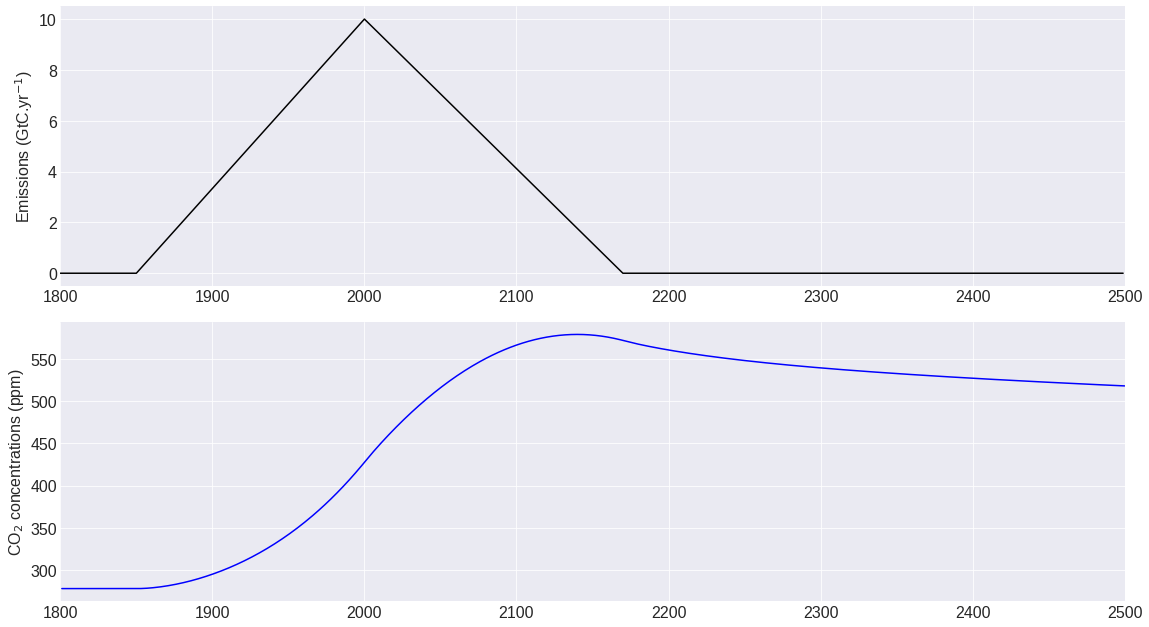

In [7]:
# ---------------------------------------------------------------------------
"""uncomment this section to use the quadratic emissions profile"""
# peak = 10
# length = 150
# total_time = 600
# co2_emms = quad_emissions(peak,length,total_time)
# ex1_plot(co2_emms)
# ---------------------------------------------------------------------------
"""uncomment this section to use the quadratic emissions profile"""
# ramp_up = 150
# peak = 10
# steady = 0
# ramp_down = 170
# bottom = 0
# total_time = 700
# co2_emms = ramp_emissions(ramp_up,peak,steady,ramp_down,bottom,total_time)
# ex1_plot(co2_emms)
# ---------------------------------------------------------------------------
"""write your own custom code to make your own emissions profile in here """
# your code to set the co2_emms variable
# ex1_plot(co2_emms)
# ---------------------------------------------------------------------------
display.display(plt.gcf()) 

Lastly we're going to take RCP85, a scenario which was seen as business as usual in 2010. Right now I've just imported it. Can you see if you can modify it and arrive at a scenario where we stabilise concentrations at 450ppm? Once you've done that, can you make a scenario where we stabilise at 350ppm or even below? Think about which year you want to stabilise in and obviously you can't cheat by modifying years before 2017!

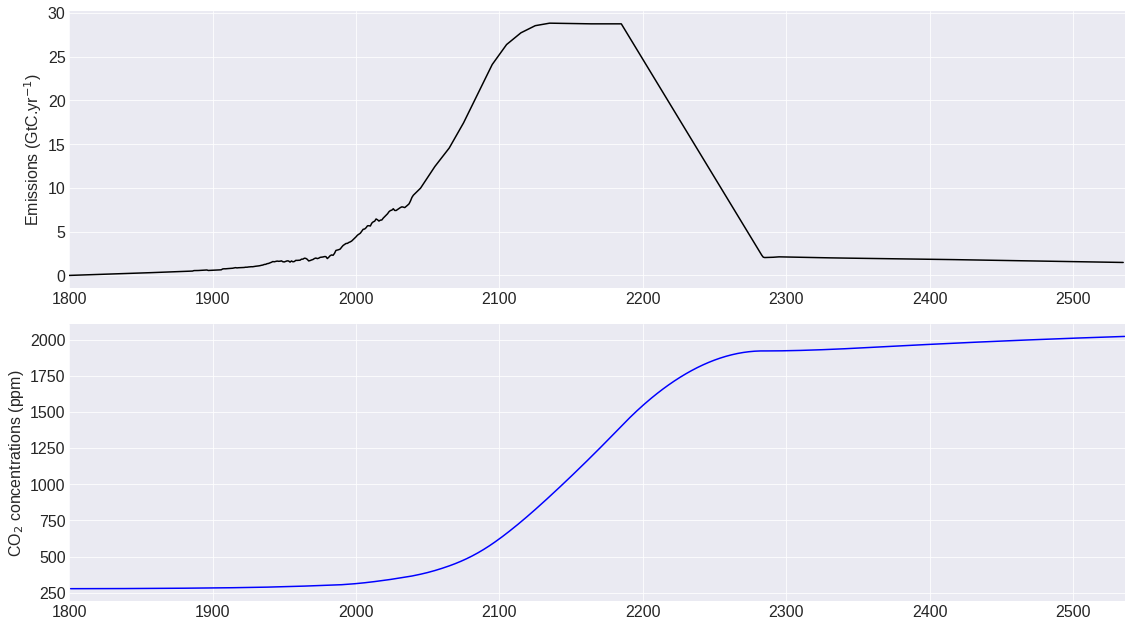

In [10]:
emms_file = './fair/RCPs/RCP85_EMISSIONS.csv'
emms_data = np.genfromtxt(emms_file,skip_header=36,delimiter=',',names=True)
emissions = emms_data['FossilCO2'] + emms_data['OtherCO2']

# -----------------------------------------------------------------------------------------------------
# Modify the RCP85 emissions in here
# The RCPs start in 1765 so you can't modify any emissions years with an index lower than 2016-1765=251
# here I provide code to create a linear drop from 2016 emissions to zero in 60 years time
# emissions[251:251+60] = emissions[251] - (emissions[251]/60)*np.arange(0,60,1)
# emissions[251+60:] = 0
# -----------------------------------------------------------------------------------------------------
# run fair
ex1_plot(emissions)
display.display(plt.gcf()) 

## Exercise 2. Investigating the effect of a step change in atmospheric CO$_2$ concentrations on temperature

### Set up

Here we are going to look at the effect of changes in atmospheric CO$_2$ concentrations on global mean temperature. To start with we introduce the set up.

Here we provide the code to make a plot of atmospheric CO$_2$ concentrations and global mean temperature. You will notice that atmospheric CO$_2$ concentrations undergo an instantaneous change from their initial, pre-industrial, value to some other, perturbed value. You will also notice that global mean temperatures respond to this perturbation. 

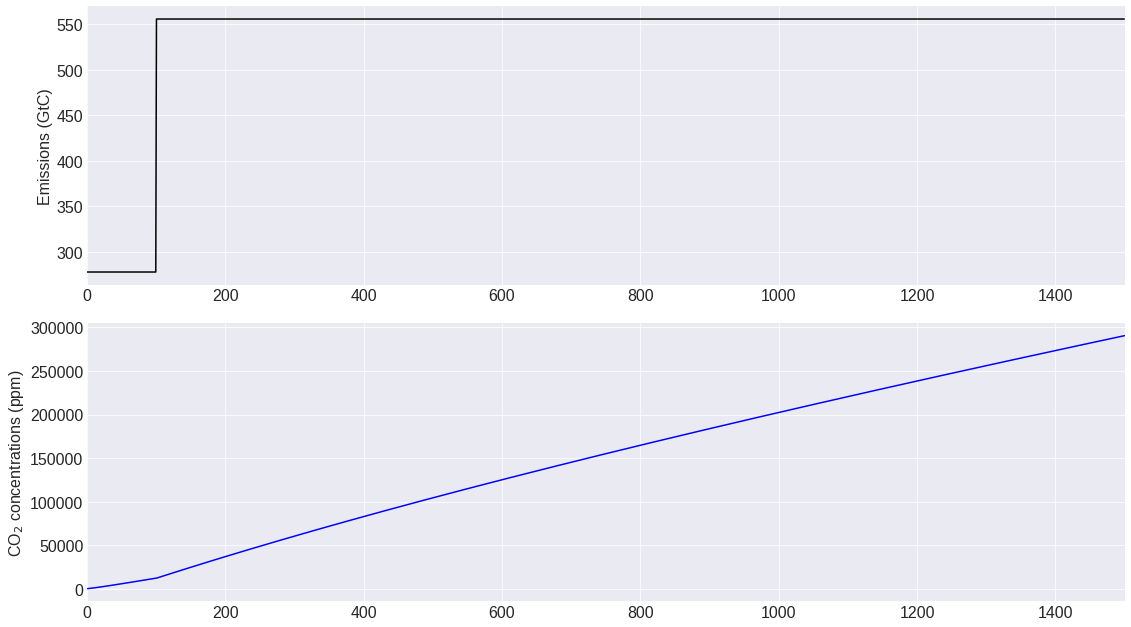

In [16]:
# set how much we would like to increase CO_2 concentrations by
co2_increase = 278.0
# set the total length of time in years
total_time = 1500
# set our pre-industrial concentration
C_0 = 278.0
# set the year in which we would like to increase CO_2 concentrations
dblt = 100

# here I define a function which sets our CO_2 concentrations array so we can
# use it later
def set_co2_concs(C_0,co2_increase,total_time):
    # set up an array to hold our CO_2 concentrations
    co2_concs = np.zeros(total_time)
    # set our pre industrial concentrations
    co2_concs[:dblt] = C_0
    # set our increased concentrations
    co2_concs[dblt:] = C_0 + co2_increase
    return co2_concs

# here I define a function to make the relevant plot for this exercise and
# return the peak temperature
def ex2_plot(co2_concs):
    # run FAIR
    C,T = fair.forward.fair_scm(co2_concs=co2_concs)
    # determine peak temperature
    T_peak = T[-1]

    # plot the output
    fig = plt.figure()
    concax = fig.add_subplot(211)
    tempax = fig.add_subplot(212)
    fig2 = plt.figure()
    junk = fig2.add_subplot(111)
    plt.close()
    fig,emmsax,concax,forcax,tempax = fair.forward.plot_fair(0.0,
                                                             C,
                                                             0.0,
                                                             T,
                                                             infig=fig,
                                                             inemmsax = junk,
                                                             inconcax = concax,
                                                             inforcax = junk,
                                                             intempax = tempax,
                                                             tuts='years')
    tempax.plot([0,len(co2_concs)],
                [T_peak,T_peak],
                label='Peak temperature anomaly: {0:.3}$^\circ$C'.format(T_peak))
    concax.set_xlim([0,len(co2_concs)])
    tempax.set_xlim(concax.get_xlim())
    legend = tempax.legend(loc='center')
    return T_peak
    
    
# now we can set our co2_concs and make the plot
co2_concs = set_co2_concs(C_0,co2_increase,total_time)
ex1_plot(co2_concs)
display.display(plt.gcf()) 

### Your turn

Now you are going to see what effect changing the increased value of atmospheric CO_2 concentrations has on peak temperature. Change the value of `co2_increase` and see what happens to your plots and peak temperature. Try doubling, tripling and quadrupling CO_2 along with other values. Note: If you haven't run the cell above, this won't work.

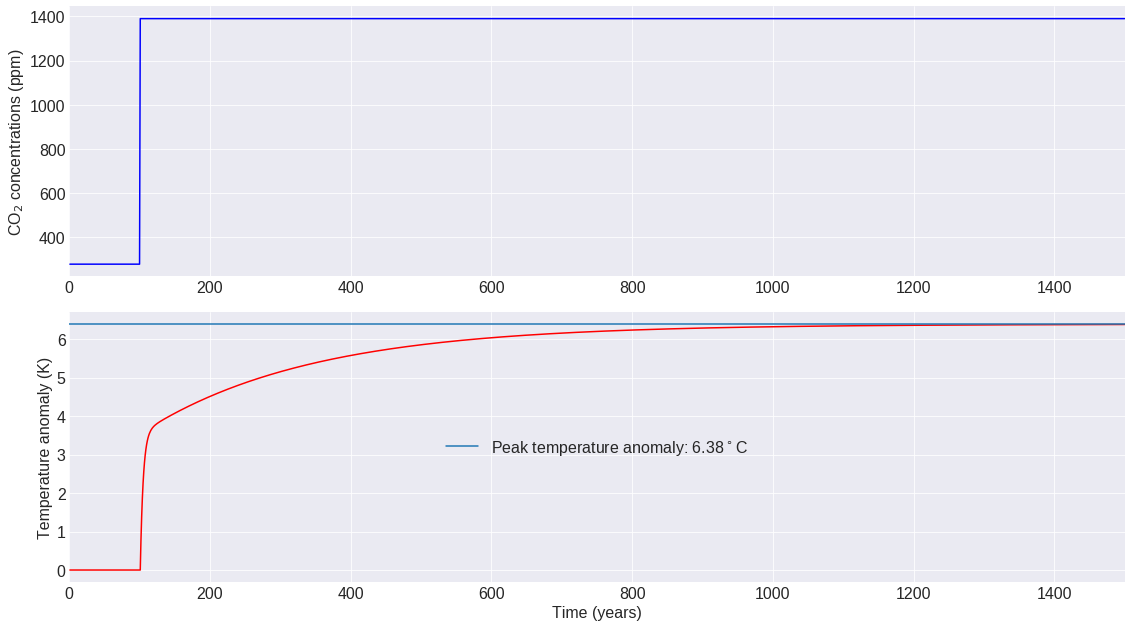

In [17]:
# set how much we would like to increase CO_2 concentrations by
co2_increase = 278*4

# make the plots
ex2_plot(set_co2_concs(C_0,co2_increase,total_time))
display.display(plt.gcf()) 

Finally, you are going to create a plot of peak temperature as a function of the increase in atmospheric CO_2 concentrations. Each time you enter a value for the increase in atmospheric CO_2 concentrations, a point will be added to the graph. Keep going until you get some sense of the relationship between these two variables.

To do the exercise, run the cell then enter `co2_increase` values until you are happy that you have a plot you like. The plot will be saved when you end as instructed by the prompt.

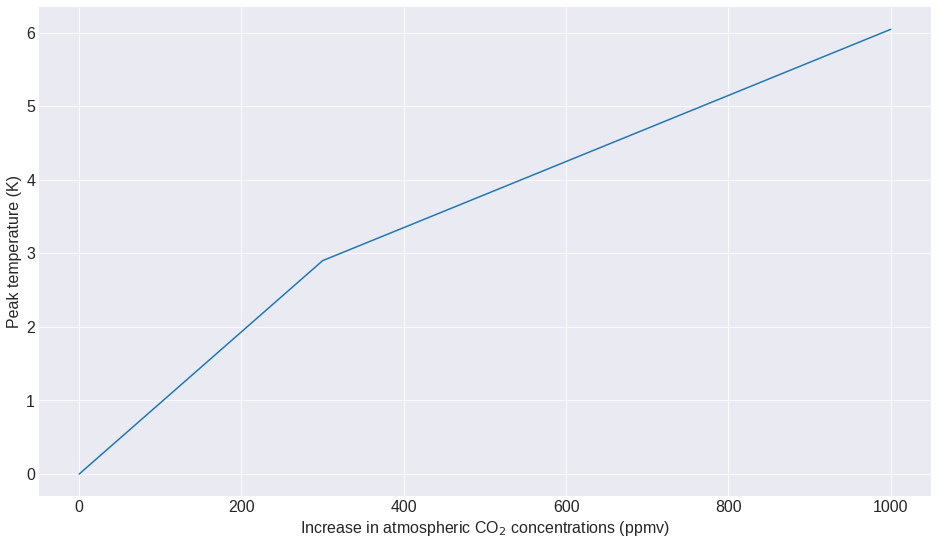

Enter "E" to end and save the figure, or anything else to continueE
figure saved as exercise-1-2017-07-14-10-49-33.png in ./exercise-figures


In [18]:
# set up lists which will hold our co2_increase and peak temperature values
co2_increases = []
peak_Ts = []
# define our 'end' variable
end = 'No'
# keep looping until we're done
while end != 'E':
    try:
        co2_increase = float(raw_input(r'Enter a value for the increase in atmospheric CO_2:'))
    except ValueError:
        print "That's not a number, try again"
        co2_increase = float(raw_input(r'Enter a value for the increase in atmospheric CO_2:'))
    # set up our figure too
    fig2 = plt.figure()
    iTax = fig2.add_subplot(111)
    iTax.set_ylabel('Peak temperature (K)')
    iTax.set_xlabel('Increase in atmospheric CO$_2$ concentrations (ppmv)')
    T_peak = ex2_plot(set_co2_concs(C_0,co2_increase,total_time))
    co2_increases.append(co2_increase)
    co2_increases.sort()
    peak_Ts.append(T_peak)
    peak_Ts.sort()
    iTax.plot(co2_increases,peak_Ts)
    display.clear_output(wait=True)
    display.display(fig2) 
    end = raw_input('Enter "E" to end and save the figure, or anything else to continue')
    
fn = 'exercise-1-{0}.png'.format(time.strftime("%Y-%m-%d-%H-%M-%S"))
fig2.savefig(join(outpath,fn),
             facecolor='silver',
             edgecolor='black',
             format='png',
             bbox_inches='tight',
             frameon=True)
print 'figure saved as {0} in {1}'.format(fn,outpath)

If you can't make head or tail of this, try entering the following values for the increase in atmospheric CO_2: 

0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000

You should end up with a figure like the following.

Here we have automated the process of determining the peak temperature for each value of the increase in atmospheric CO$_2$ concentrations.

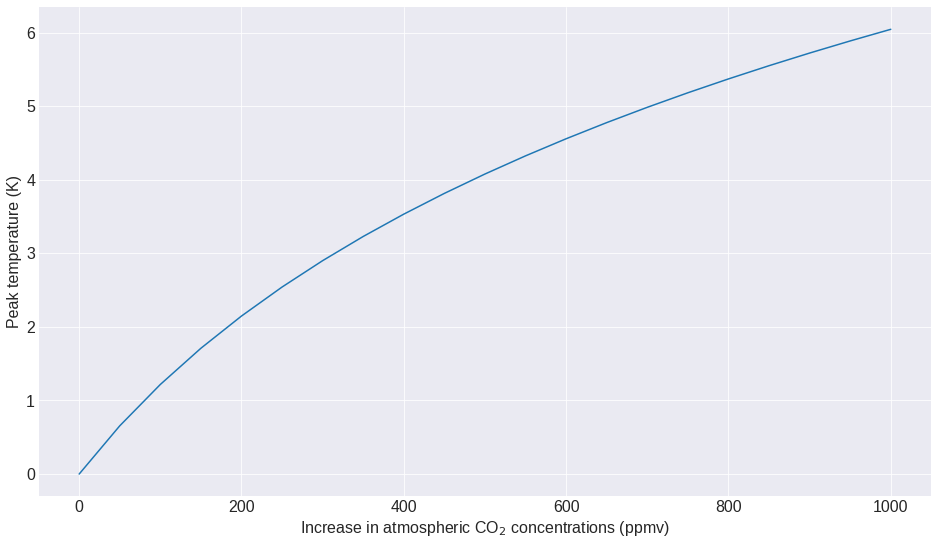

figure saved as exercise-1-2017-07-14-10-49-38.png in ./exercise-figures


In [19]:
# set up lists which will hold our co2_increase and peak temperature values
co2_increases = np.linspace(0,1000,num=21)
peak_Ts = []

# loop over all co2_increase values
for co2_increase in co2_increases:
    # run FAIR
    C,T = fair.forward.fair_scm(co2_concs=set_co2_concs(C_0,co2_increase,total_time))
    # save peak temperature
    peak_Ts.append(T[-1])

# set up our figure 
fig = plt.figure()
iTax = fig.add_subplot(111)
iTax.plot(co2_increases,peak_Ts)
iTax.set_ylabel('Peak temperature (K)')
iTax.set_xlabel('Increase in atmospheric CO$_2$ concentrations (ppmv)')
display.display(fig)
fn = 'exercise-1-{0}.png'.format(time.strftime("%Y-%m-%d-%H-%M-%S"))
fig2.savefig(join(outpath,fn),
             facecolor='silver',
             edgecolor='black',
             format='png',
             bbox_inches='tight',
             frameon=True)
print 'figure saved as {0} in {1}'.format(fn,outpath)